In [ ]:
#Convolutional neural network (CNN)
#Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

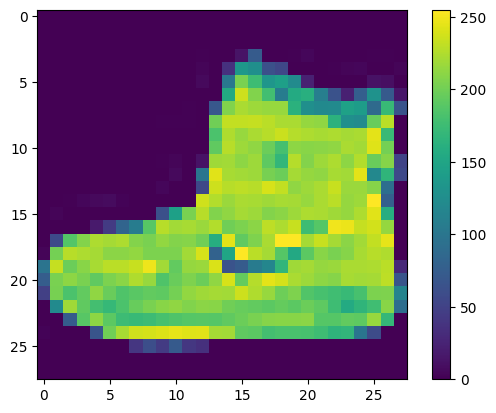

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

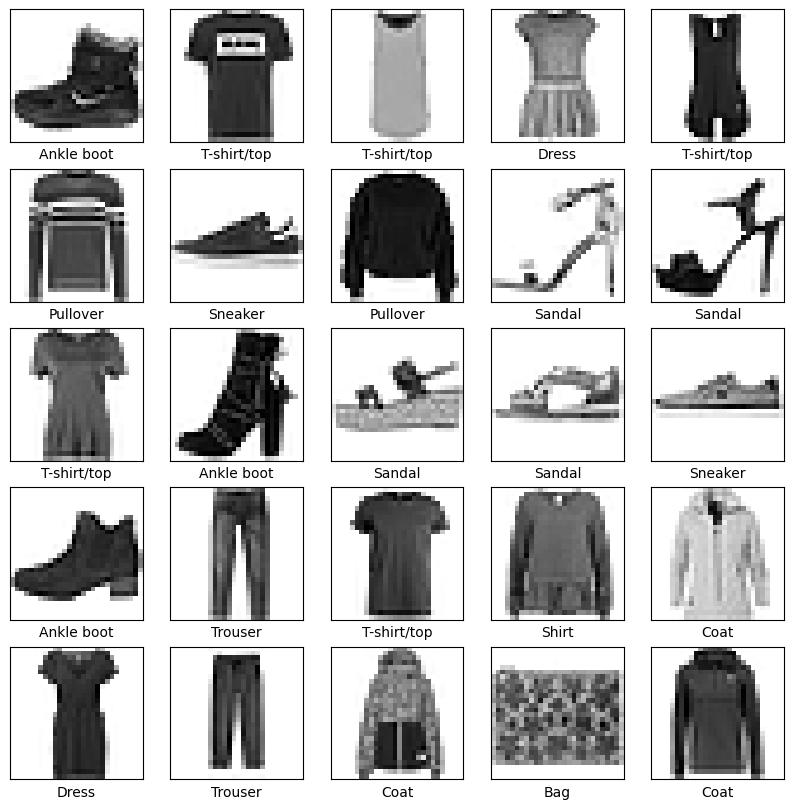

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4967 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3705 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3362 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3123 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2921 - accuracy: 0.8936
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2810 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2680 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2560 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2470 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss:

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3332 - accuracy: 0.8848 - 826ms/epoch - 3ms/step

Test accuracy: 0.8848000168800354


In [23]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [25]:
predictions[0]

array([2.40489282e-08, 7.46303089e-11, 6.33969677e-09, 7.24393878e-11,
       6.71891265e-10, 1.04554452e-03, 3.53140422e-07, 1.33778015e-02,
       2.05288284e-08, 9.85576153e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

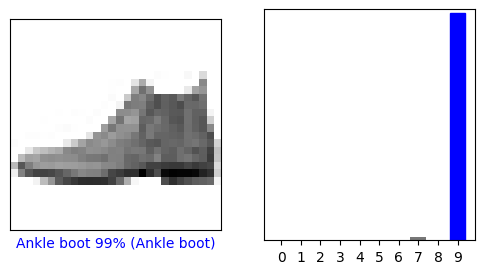

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

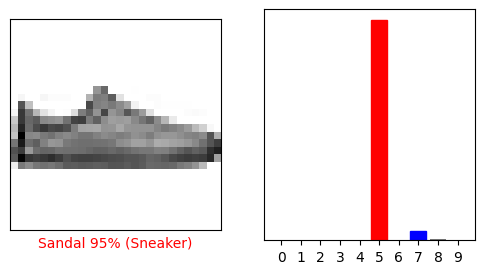

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

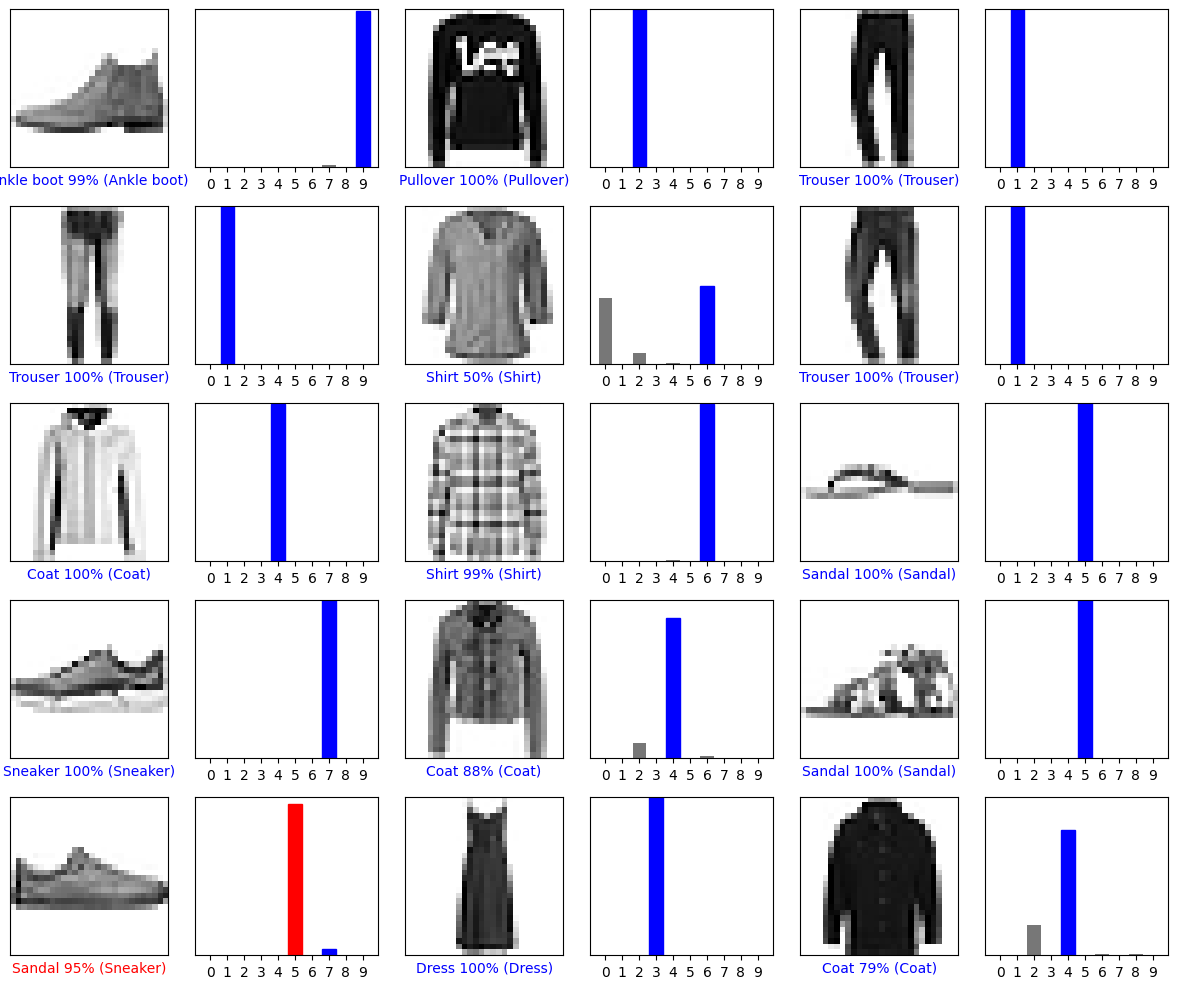

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[8.7569833e-06 1.2896194e-15 9.9915957e-01 1.7109362e-12 7.9275895e-04
  7.9542467e-15 3.8903989e-05 1.2190784e-16 5.0815414e-11 8.1595116e-15]]


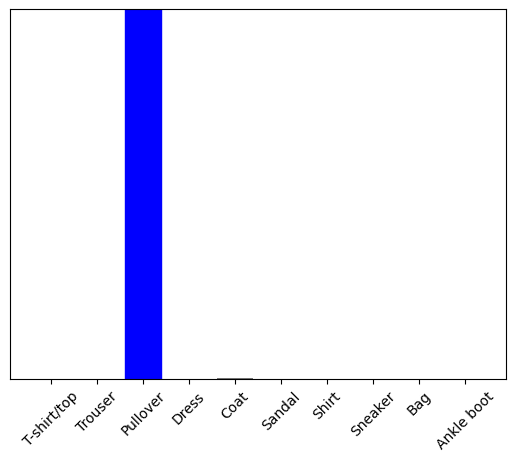

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [36]:
np.argmax(predictions_single[0])

2